<a href="https://colab.research.google.com/github/rishivanshi01/repos/blob/main/Titanic_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTRODUCTION**

Name-Rishi Raghuwanshi

Project Name- Titanic Classification

PROJECT AIM:-Building a data model  which tells whether the person will be save from sinking in Titanic.

#DATA COLLECTION AND PROCESSING

IMPORTING THE LIBRARY

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

LOADING AND READING THE DATA

In [ ]:
titanic=pd.read_csv("/content/train[1].csv")
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.shape


(891, 12)

ANALYSING DATA

<Axes: xlabel='Survived', ylabel='count'>

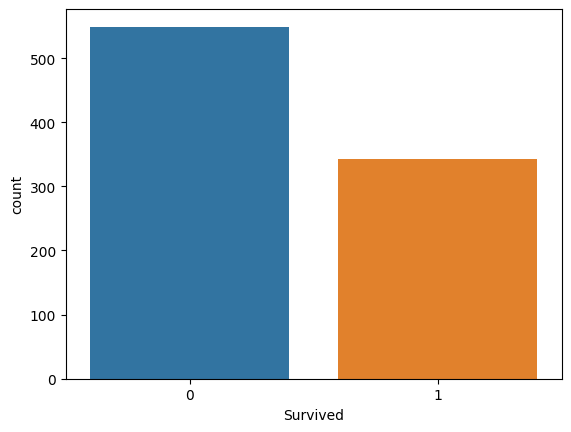

In [ ]:
sns.countplot(x="Survived",data=titanic)

<Axes: xlabel='Survived', ylabel='count'>

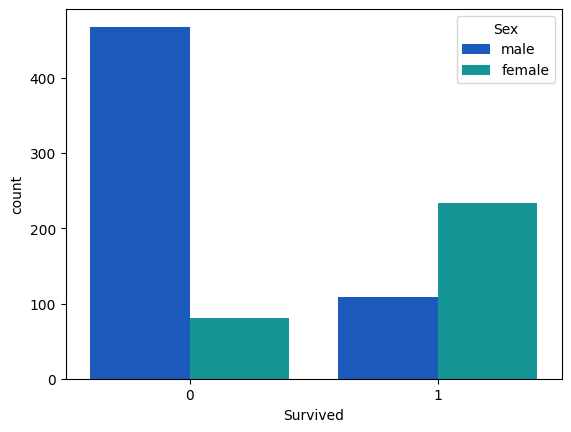

In [ ]:
sns.countplot(x='Survived',hue="Sex",data=titanic,palette='winter')

*Analysis: 0 represents not survived and 1 represents survived*

*Women are thrice more likely to survive than males*

<Axes: xlabel='Survived', ylabel='count'>

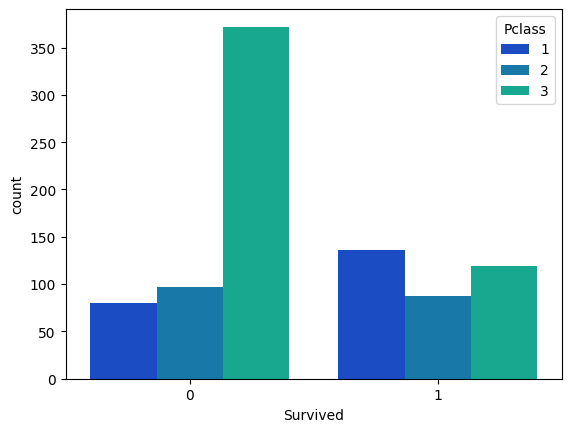

In [ ]:
sns.countplot(x='Survived',hue="Pclass",data=titanic,palette='winter')

*Analysis- The Passengers who has not survived belong to third class*

*1st class passengers are more likely to survived*

<Axes: ylabel='Frequency'>

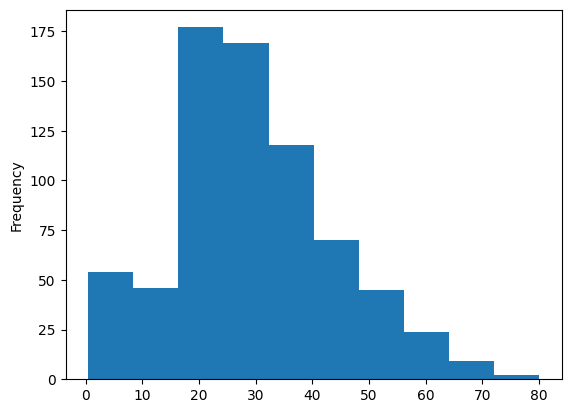

In [ ]:
titanic['Age'].plot.hist()

*Analysis=We notice that highest age group travelling is from 20-40*

*Very few are from age groups 70-80*

<Axes: ylabel='Frequency'>

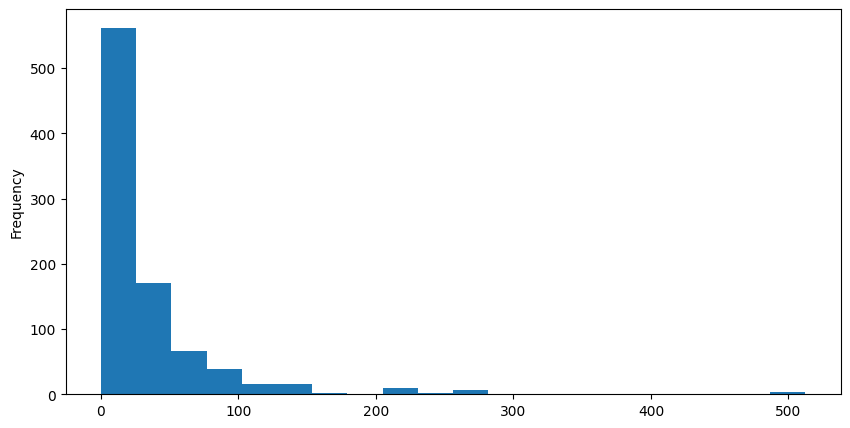

In [ ]:
titanic['Fare'].plot.hist(bins=20,figsize=(10,5))


*We notice that most of the tickets brought are under 100*

*And very few are under 220-500*

<Axes: xlabel='SibSp', ylabel='count'>

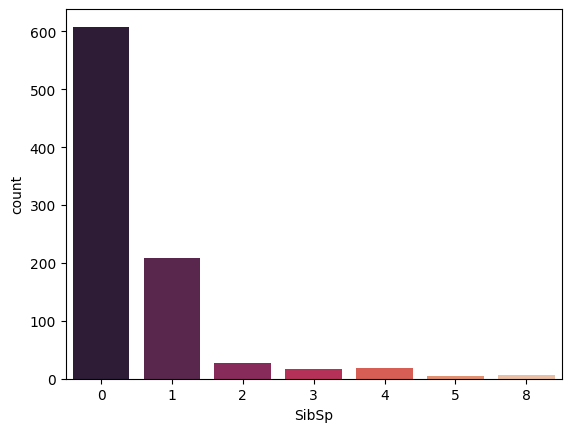

In [ ]:
sns.countplot(x='SibSp',data=titanic,palette='rocket')

*Analysis=We can see that most of the passengers have not their siblings aboard*

<Axes: xlabel='Parch', ylabel='count'>

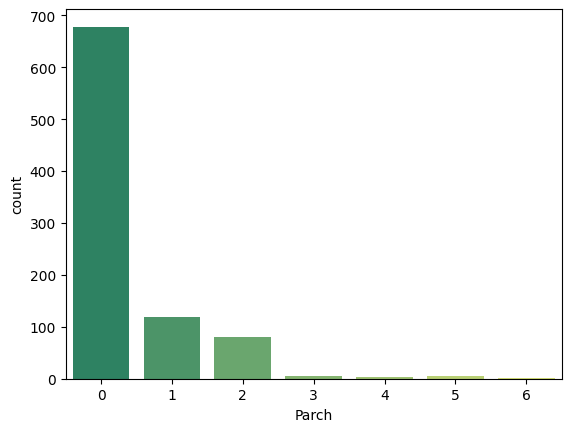

In [ ]:
sns.countplot(x='Parch',data=titanic,palette='summer')

<Axes: ylabel='Frequency'>

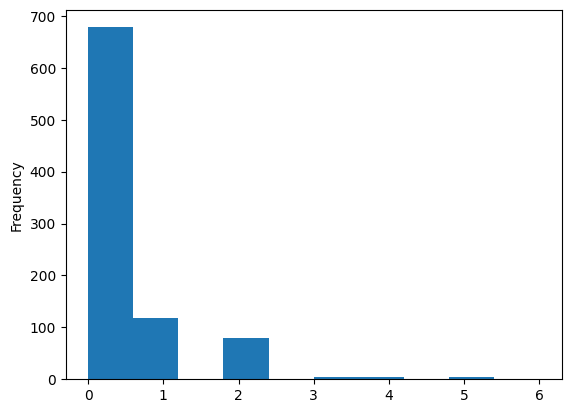

In [ ]:
titanic['Parch'].plot.hist()

# DATA WRANGLING

In [ ]:
#Data Wrangling means cleaning the data,removing the null values,
#dropping the columns and adding newone if required

In [ ]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#Age and Cabin have null values and Embarked too has some null values
#we can plot it on heatmap

<Axes: >

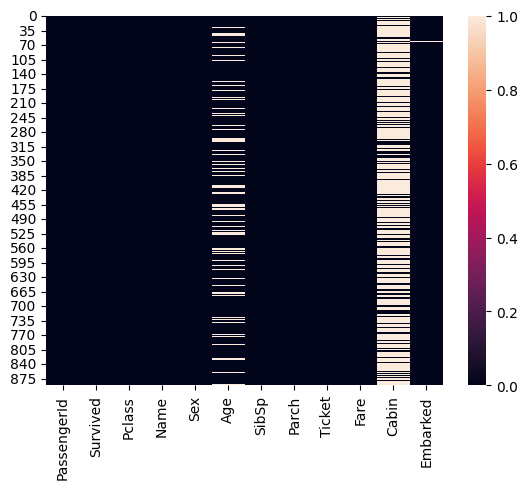

In [ ]:
sns.heatmap(titanic.isnull())

In [ ]:
#here we can see the null values are more in Cabin ,followed by Age and Embarked

<Axes: xlabel='Pclass', ylabel='Age'>

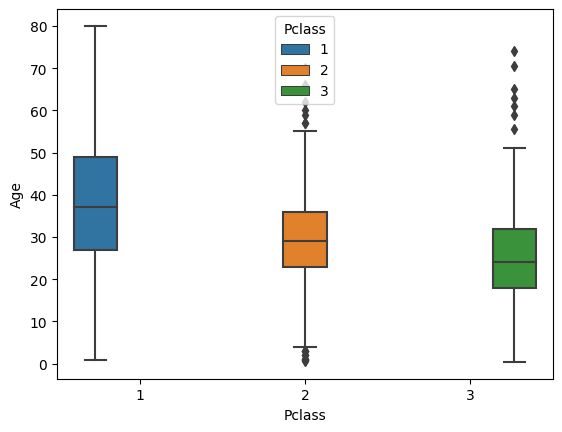

In [ ]:
sns.boxplot(x="Pclass",y="Age",data=titanic,hue="Pclass")

In [ ]:
#We can observe that older age group are travelling more in Class 1 and 2 compared to class 3
#hue parameters determines which column in the data frame must be used for colour encoding

In [ ]:
#Now We will drop a column if not needed

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.drop('Cabin',axis=1, inplace=True)

In [ ]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [ ]:
titanic.dropna(inplace=True)

<Axes: >

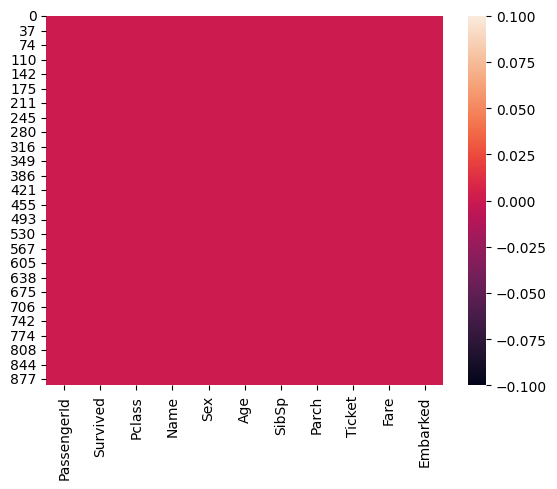

In [ ]:
sns.heatmap(titanic.isnull())

In [ ]:
#this shows that now no null values is present in data.we can also check it

In [ ]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [ ]:
#finding the number of people survived and number of people not survived

In [ ]:
titanic['Survived'].value_counts()

0    424
1    288
Name: Survived, dtype: int64

# Data Visualisation

In [ ]:
#Encoding the categorical column

In [ ]:
titanic['Survived'].value_counts()

0    424
1    288
Name: Survived, dtype: int64

In [ ]:
titanic['Embarked'].value_counts()

S    554
C    130
Q     28
Name: Embarked, dtype: int64

In [ ]:
#Converting the categorical columns
titanic.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [ ]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0


Seperating Features and Target

In [ ]:
X=titanic.drop(columns= ['PassengerId','Survived','Name','Ticket'],axis=1)
Y=titanic['Survived']

In [ ]:
print(X)

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         3    0  22.0      1      0   7.2500         0
1         1    1  38.0      1      0  71.2833         1
2         3    1  26.0      0      0   7.9250         0
3         1    1  35.0      1      0  53.1000         0
4         3    0  35.0      0      0   8.0500         0
..      ...  ...   ...    ...    ...      ...       ...
885       3    1  39.0      0      5  29.1250         2
886       2    0  27.0      0      0  13.0000         0
887       1    1  19.0      0      0  30.0000         0
889       1    0  26.0      0      0  30.0000         1
890       3    0  32.0      0      0   7.7500         2

[712 rows x 7 columns]


In [ ]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.33,random_state=4)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(712, 7) (477, 7) (235, 7)


#MODEL TRAINING

LOGISTIC REGRESSION


In [ ]:
from sklearn.linear_model import LogisticRegression
ln=LogisticRegression()

In [ ]:
ln.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
prediction=ln.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
confusion_matrix(Y_test,prediction)

array([[124,  21],
       [ 29,  61]])

accuracy on test data

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(Y_test,prediction)*100

78.72340425531915

accuracy on train data


In [ ]:
prediction=ln.predict(X_train)

In [ ]:
confusion_matrix(Y_train,prediction)

array([[237,  42],
       [ 50, 148]])

In [ ]:
accuracy_score(Y_train,prediction)*100

80.71278825995807

#CONCLUSION

We got our accuracy score as 78.7 and 80.7 while training on both te datas.It
means are model is not overfitted and neither underfitted ,it is generalising well and can predict the data quite accurately